In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Increase graph quality
mpl.rcParams['figure.dpi']= 600

In [2]:
df1 = pd.read_csv('results/base_and_queryvolution/2-kws_base_and_queryvolution_46-88.csv', sep=';')
df2 = pd.read_csv('results/base_and_queryvolution/2-kws_base_and_queryvolution_90-130.csv', sep=';')
df3 = pd.read_csv('results/base_and_queryvolution/2-kws_base_and_queryvolution_5known_46-74.csv', sep=';')
df4 = pd.read_csv('results/base_and_queryvolution/2-kws_base_and_queryvolution_5known_76-88.csv', sep=';')
df5 = pd.read_csv('results/base_and_queryvolution/2-kws_base_and_queryvolution_5known_90-130.csv', sep=';')
df6 = pd.read_csv('results/base_and_queryvolution/2-kws_base_and_queryvolution_10known_46-100.csv', sep=';')
df7 = pd.read_csv('results/base_and_queryvolution/2-kws_base_and_queryvolution_10known_102-130.csv', sep=';')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

df.tail()

,Nb similar docs,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc,Refinement acc
745,12043,18066,130,1257,10,0.087410,0.755413
746,12043,18066,130,1257,10,0.091419,0.738573
747,12043,18066,130,1257,10,0.080994,0.812350
748,12043,18066,130,1257,10,0.116279,0.816359
749,12043,18066,130,1257,10,0.089816,0.676022


In [3]:
# Special case for only base attack range(135, 201, 5)
df_base = pd.read_csv('results/base_and_queryvolution/2-kws_base_135-200.csv', sep=';')

df_base.tail()

,Nb similar docs,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc
2095,12043,18066,200,2985,60,0.384957
2096,12043,18066,200,2985,60,0.362393
2097,12043,18066,200,2985,60,0.381880
2098,12043,18066,200,2985,60,0.359658
2099,12043,18066,200,2985,60,0.311795


In [4]:
df_5_known_queries = df.loc[df['Nb queries known'] == 5]
df_10_known_queries = df.loc[df['Nb queries known'] == 10]
df_15_known_queries = df.loc[df['Nb queries known'] == 15]
df_30_known_queries = df.loc[df['Nb queries known'] == 30]
df_60_known_queries = df.loc[df['Nb queries known'] == 60]

df_30_known_queries.head()

,Nb similar docs,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc,Refinement acc
50,12043,18066,46,155,30,0.920,0.984
51,12043,18066,46,155,30,0.912,0.992
52,12043,18066,46,155,30,0.936,0.944
53,12043,18066,46,155,30,0.960,1.000
54,12043,18066,46,155,30,0.936,0.992


In [5]:
df_base_15_known_queries = df_base.loc[df_base['Nb queries known'] == 15]
df_base_30_known_queries = df_base.loc[df_base['Nb queries known'] == 30]
df_base_60_known_queries = df_base.loc[df_base['Nb queries known'] == 60]

df_base_60_known_queries.head()

,Nb similar docs,Nb server docs,Similar/Server voc size,Nb queries seen,Nb queries known,Base acc
100,12043,18066,135,1356,60,0.569444
101,12043,18066,135,1356,60,0.495370
102,12043,18066,135,1356,60,0.548611
103,12043,18066,135,1356,60,0.594136
104,12043,18066,135,1356,60,0.594907


In [6]:
df_base_15_base_acc = df_base_15_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_base_15_base_min = df_base_15_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_base_15_base_max = df_base_15_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

df_base_30_base_acc = df_base_30_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_base_30_base_min = df_base_30_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_base_30_base_max = df_base_30_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

df_base_60_base_acc = df_base_60_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_base_60_base_min = df_base_60_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_base_60_base_max = df_base_60_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

In [7]:
df_5_base_acc = df_5_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_5_base_min = df_5_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_5_base_max = df_5_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

df_10_base_acc = df_10_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_10_base_min = df_10_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_10_base_max = df_10_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

df_15_base_acc = df_15_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_15_base_min = df_15_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_15_base_max = df_15_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

df_30_base_acc = df_30_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_30_base_min = df_30_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_30_base_max = df_30_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

df_60_base_acc = df_60_known_queries.groupby('Similar/Server voc size')['Base acc'].mean()
df_60_base_min = df_60_known_queries.groupby('Similar/Server voc size')['Base acc'].min()
df_60_base_max = df_60_known_queries.groupby('Similar/Server voc size')['Base acc'].max()

df_5_refined_acc = df_5_known_queries.groupby('Similar/Server voc size')['Refinement acc'].mean()
df_5_refined_min = df_5_known_queries.groupby('Similar/Server voc size')['Refinement acc'].min()
df_5_refined_max = df_5_known_queries.groupby('Similar/Server voc size')['Refinement acc'].max()

df_10_refined_acc = df_10_known_queries.groupby('Similar/Server voc size')['Refinement acc'].mean()
df_10_refined_min = df_10_known_queries.groupby('Similar/Server voc size')['Refinement acc'].min()
df_10_refined_max = df_10_known_queries.groupby('Similar/Server voc size')['Refinement acc'].max()

df_15_refined_acc = df_15_known_queries.groupby('Similar/Server voc size')['Refinement acc'].mean()
df_15_refined_min = df_15_known_queries.groupby('Similar/Server voc size')['Refinement acc'].min()
df_15_refined_max = df_15_known_queries.groupby('Similar/Server voc size')['Refinement acc'].max()

df_30_refined_acc = df_30_known_queries.groupby('Similar/Server voc size')['Refinement acc'].mean()
df_30_refined_min = df_30_known_queries.groupby('Similar/Server voc size')['Refinement acc'].min()
df_30_refined_max = df_30_known_queries.groupby('Similar/Server voc size')['Refinement acc'].max()

df_60_refined_acc = df_60_known_queries.groupby('Similar/Server voc size')['Refinement acc'].mean()
df_60_refined_min = df_60_known_queries.groupby('Similar/Server voc size')['Refinement acc'].min()
df_60_refined_max = df_60_known_queries.groupby('Similar/Server voc size')['Refinement acc'].max()



In [8]:
df_15_base_acc = pd.concat([df_15_base_acc, df_base_15_base_acc])
df_15_base_min = pd.concat([df_15_base_min, df_base_15_base_min])
df_15_base_max = pd.concat([df_15_base_max, df_base_15_base_max])
df_30_base_acc = pd.concat([df_30_base_acc, df_base_30_base_acc])
df_30_base_min = pd.concat([df_30_base_min, df_base_30_base_min])
df_30_base_max = pd.concat([df_30_base_max, df_base_30_base_max])
df_60_base_acc = pd.concat([df_60_base_acc, df_base_60_base_acc])
df_60_base_min = pd.concat([df_60_base_min, df_base_60_base_min])
df_60_base_max = pd.concat([df_60_base_max, df_base_60_base_max])

In [9]:
df_15_base_acc.tail()

Similar/Server voc size
180    0.075510
185    0.066548
190    0.068984
195    0.059079
200    0.054855
Name: Base acc, dtype: float64

In [10]:
df_15_base_acc.head()

Similar/Server voc size
46    0.714571
48    0.651818
50    0.621548
52    0.601858
54    0.612764
Name: Base acc, dtype: float64

In [11]:
df_15_refined_acc.tail()

Similar/Server voc size
122    0.859835
124    0.840319
126    0.844082
128    0.844452
130    0.840193
Name: Refinement acc, dtype: float64

In [12]:
df_5_base_acc.tail()

Similar/Server voc size
122    0.029800
124    0.031178
126    0.028503
128    0.028138
130    0.026438
Name: Base acc, dtype: float64

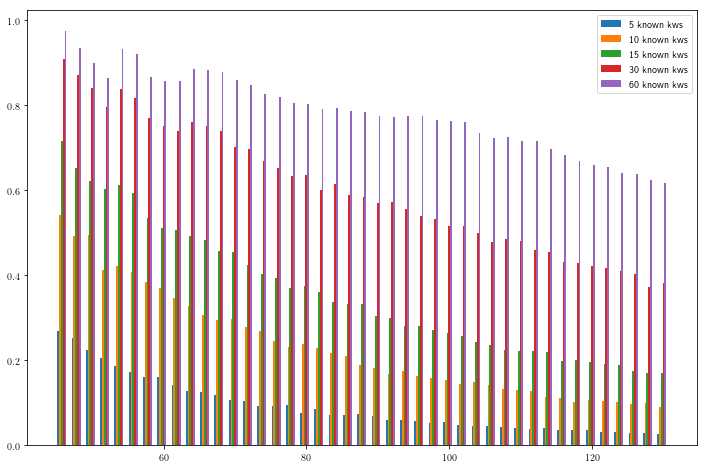

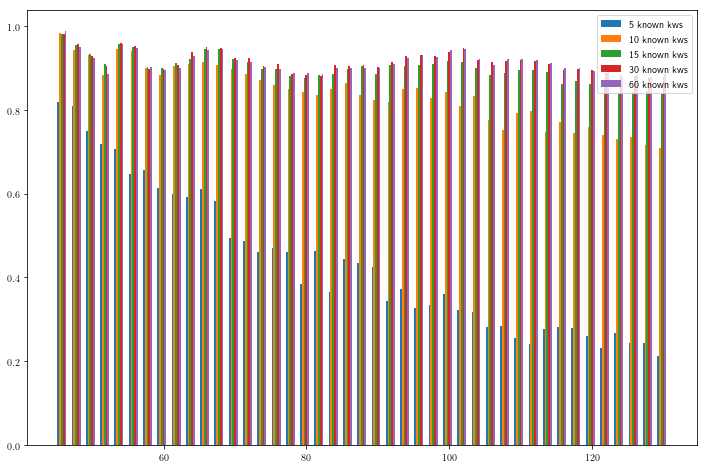

In [13]:
xs = np.array(list(range(46, 131, 2)))

width = 0.25

plt.rcParams["figure.figsize"] = (12,8)
mpl.rc('text', usetex = True)

# Base accuracy
plt.bar(xs - 3 * width, df_5_base_acc, width, label="5 known kws")
plt.bar(xs - 2 * width, df_10_base_acc, width, label="10 known kws")
plt.bar(xs - width, df_15_base_acc[:43], width, label="15 known kws")
plt.bar(xs, df_30_base_acc[:43], width, label="30 known kws")
plt.bar(xs + width, df_60_base_acc[:43], width, label="60 known kws")
plt.legend()
plt.show()

# Refined accuracy
plt.bar(xs - 3 * width, df_5_refined_acc, width, label="5 known kws")
plt.bar(xs - 2 * width, df_10_refined_acc, width, label="10 known kws")
plt.bar(xs - width, df_15_refined_acc, width, label="15 known kws")
plt.bar(xs, df_30_refined_acc, width, label="30 known kws")
plt.bar(xs + width, df_60_refined_acc, width, label="60 known kws")
plt.legend()
plt.show()

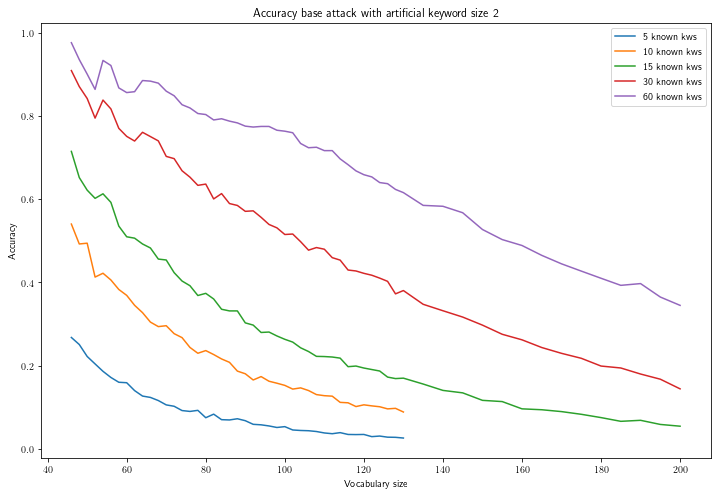

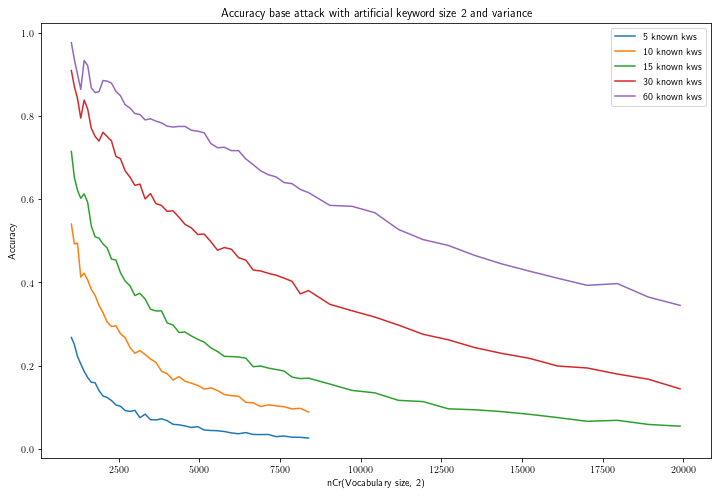

In [14]:
xs = np.array(list(range(46, 131, 2)))
xs_200 = np.array(list(range(135, 201, 5)))

xs = [x*(x+1)/2-x for x in xs]
xs_200 = [x*(x+1)/2-x for x in xs_200]

plt.plot(df_5_base_acc, label="5 known kws")
# plt.fill_between(x=xs, y1=df_5_base_min, y2=df_5_base_max, alpha=0.5)

plt.plot(df_10_base_acc, label="10 known kws")
# plt.fill_between(x=xs, y1=df_15_base_min, y2=df_10_base_max, alpha=0.5)

plt.plot(df_15_base_acc, label="15 known kws")
# plt.fill_between(x=xs, y1=df_15_base_min, y2=df_15_max, alpha=0.5)

plt.plot(df_30_base_acc, label="30 known kws")
# plt.fill_between(x=xs, y1=df_30_base_min, y2=df_30_max, alpha=0.5)

plt.plot(df_60_base_acc, label="60 known kws")
# plt.fill_between(x=xs, y1=df_60_base_min, y2=df_60_max, alpha=0.5, color='black')

plt.title("Accuracy base attack with artificial keyword size 2")
plt.ylabel("Accuracy")
plt.xlabel("Vocabulary size")

plt.legend()
plt.show()

plt.plot(xs, df_5_base_acc, label="5 known kws")
# plt.fill_between(x=xs, y1=df_5_base_min, y2=df_5_base_max, alpha=0.5)

plt.plot(xs, df_10_base_acc, label="10 known kws")
# plt.fill_between(x=xs, y1=df_15_base_min, y2=df_10_base_max, alpha=0.5)

plt.plot(xs + xs_200, df_15_base_acc, label="15 known kws")
# plt.fill_between(x=xs, y1=df_15_base_min, y2=df_15_base_max, alpha=0.5)

plt.plot(xs + xs_200, df_30_base_acc, label="30 known kws")
# plt.fill_between(x=xs, y1=df_30_base_min, y2=df_30_base_max, alpha=0.5)

plt.plot(xs + xs_200, df_60_base_acc, label="60 known kws")
# plt.fill_between(x=xs, y1=df_60_base_min, y2=df_60_base_max, alpha=0.5)

plt.title("Accuracy base attack with artificial keyword size 2 and variance")
plt.ylabel("Accuracy")
plt.xlabel("nCr(Vocabulary size, 2)")

plt.legend()
plt.show()

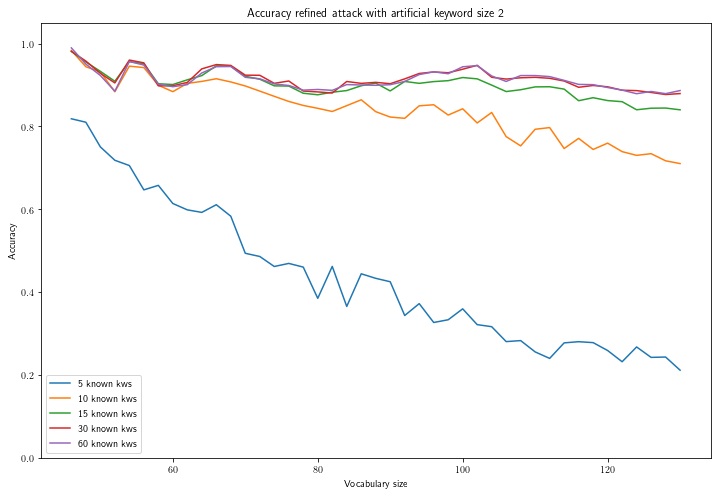

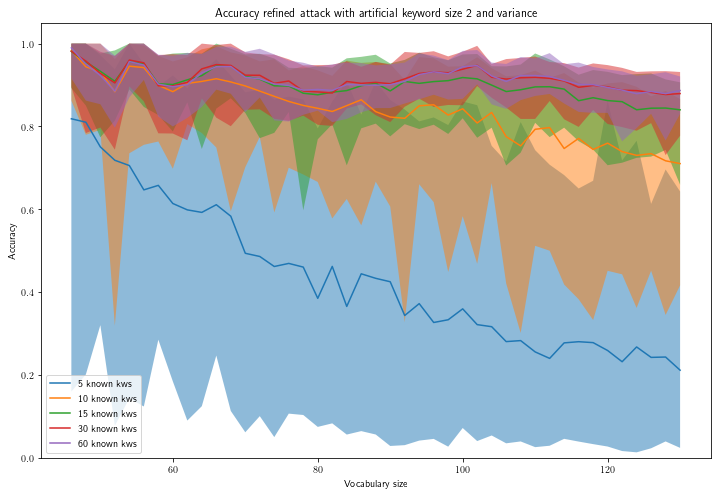

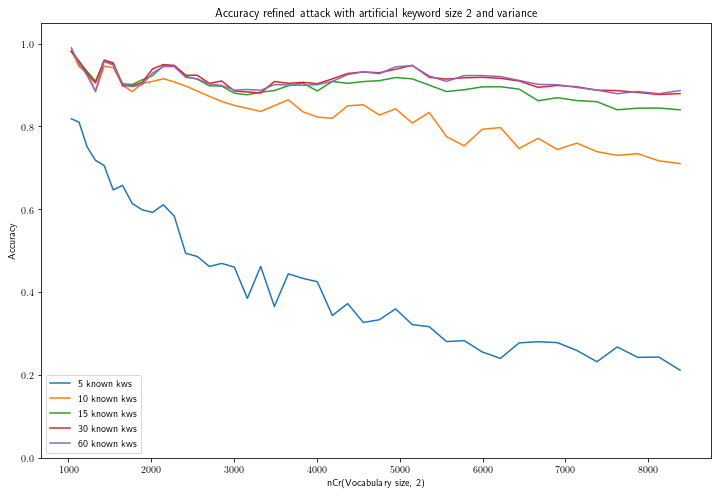

In [15]:
xs = np.array(list(range(46, 131, 2)))

xs_comb = [x*(x+1)/2-x for x in xs]

plt.plot(xs, df_5_refined_acc, label="5 known kws")

plt.plot(xs, df_10_refined_acc, label="10 known kws")

plt.plot(xs, df_15_refined_acc, label="15 known kws")

plt.plot(xs, df_30_refined_acc, label="30 known kws")

plt.plot(xs, df_60_refined_acc, label="60 known kws")

plt.ylim(top=1.05, bottom=0.0)

plt.title("Accuracy refined attack with artificial keyword size 2")
plt.ylabel("Accuracy")
plt.xlabel("Vocabulary size")

plt.legend(loc='lower left')
plt.show()

plt.plot(xs, df_5_refined_acc, label="5 known kws")
plt.fill_between(x=xs, y1=df_5_refined_min, y2=df_5_refined_max, alpha=0.5)

plt.plot(xs, df_10_refined_acc, label="10 known kws")
plt.fill_between(x=xs, y1=df_10_refined_min, y2=df_10_refined_max, alpha=0.5)

plt.plot(xs, df_15_refined_acc, label="15 known kws")
plt.fill_between(x=xs, y1=df_15_refined_min, y2=df_15_refined_max, alpha=0.5)

plt.plot(xs, df_30_refined_acc, label="30 known kws")
plt.fill_between(x=xs, y1=df_30_refined_min, y2=df_30_refined_max, alpha=0.5)

plt.plot(xs, df_60_refined_acc, label="60 known kws")
plt.fill_between(x=xs, y1=df_60_refined_min, y2=df_60_refined_max, alpha=0.5)

plt.ylim(top=1.05, bottom=0.0)

plt.title("Accuracy refined attack with artificial keyword size 2 and variance")
plt.ylabel("Accuracy")
plt.xlabel("Vocabulary size")

plt.legend(loc='lower left')
plt.show()

plt.plot(xs_comb, df_5_refined_acc, label="5 known kws")
# plt.fill_between(x=xs_comb, y1=df_5_refined_min, y2=df_5_refined_max, alpha=0.5)

plt.plot(xs_comb, df_10_refined_acc, label="10 known kws")
# plt.fill_between(x=xs_comb, y1=df_10_refined_min, y2=df_10_refined_max, alpha=0.5)

plt.plot(xs_comb, df_15_refined_acc, label="15 known kws")
# plt.fill_between(x=xs_comb, y1=df_15_refined_min, y2=df_15_refined_max, alpha=0.5)

plt.plot(xs_comb, df_30_refined_acc, label="30 known kws")
# plt.fill_between(x=xs_comb, y1=df_30_refined_min, y2=df_30_refined_max, alpha=0.5)

plt.plot(xs_comb, df_60_refined_acc, label="60 known kws")
# plt.fill_between(x=xs_comb, y1=df_60_refined_min, y2=df_60_refined_max, alpha=0.5)

plt.ylim(top=1.05, bottom=0.0)

plt.title("Accuracy refined attack with artificial keyword size 2 and variance")
plt.ylabel("Accuracy")
plt.xlabel("nCr(Vocabulary size, 2)")

plt.legend(loc='lower left')
plt.show()

## Individual vocabulary size accuracy with variance

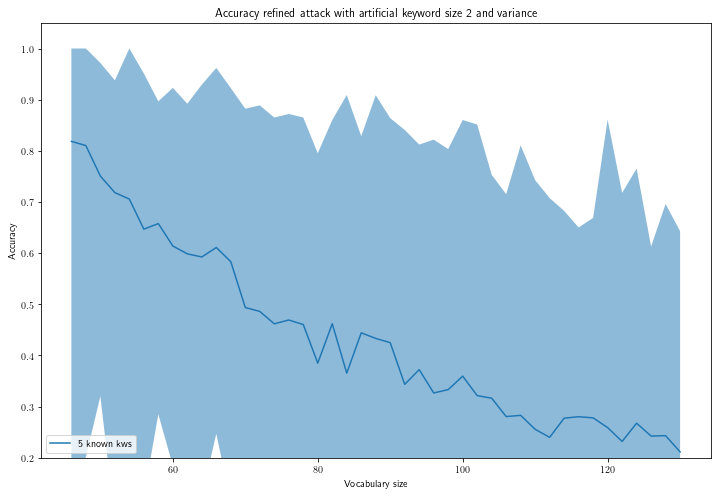

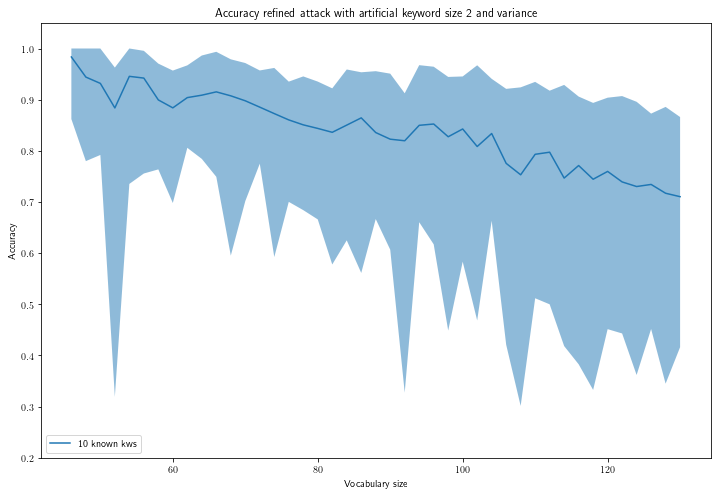

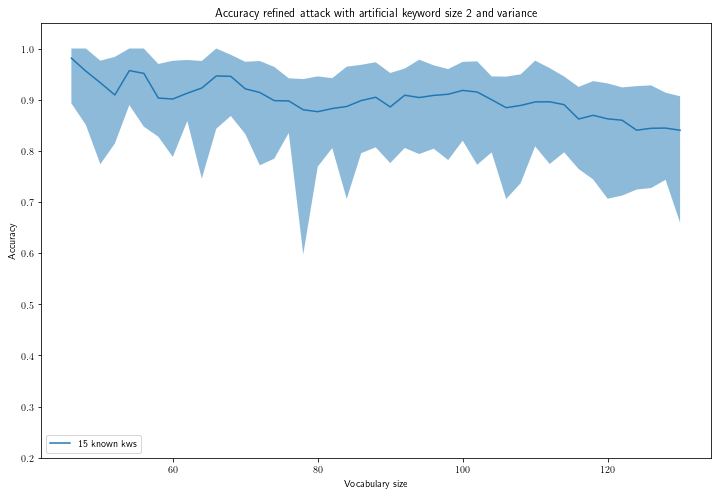

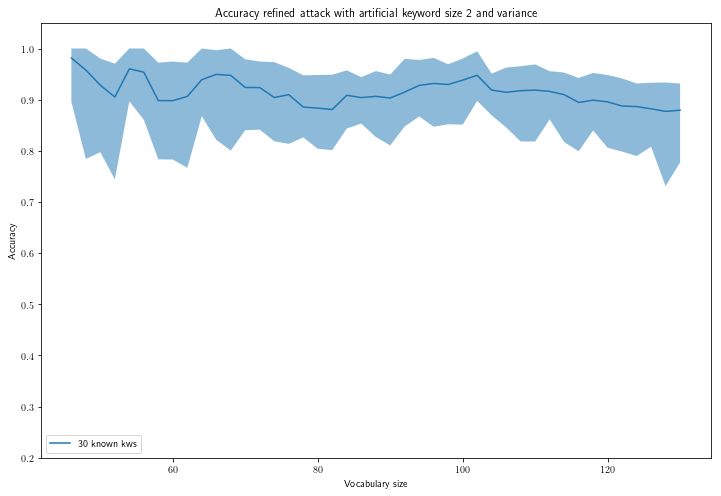

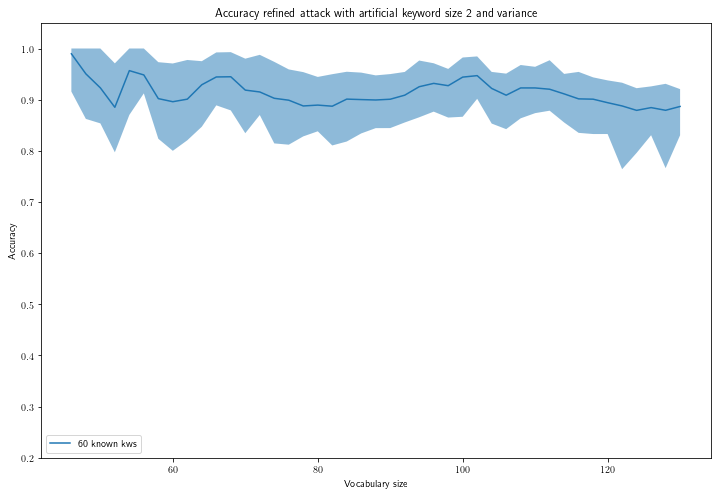

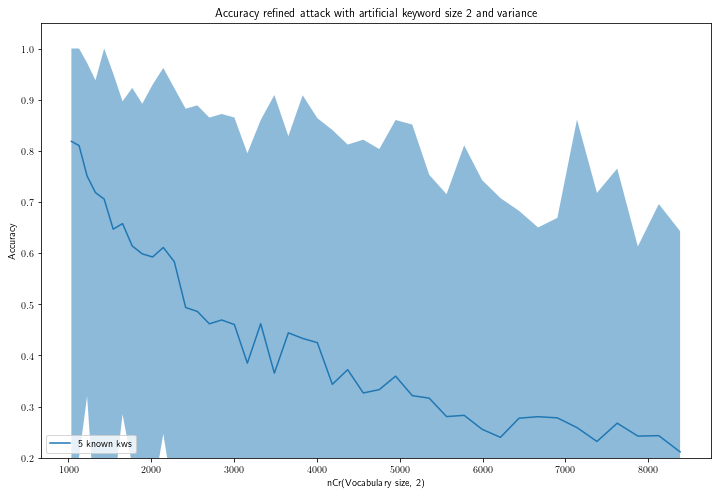

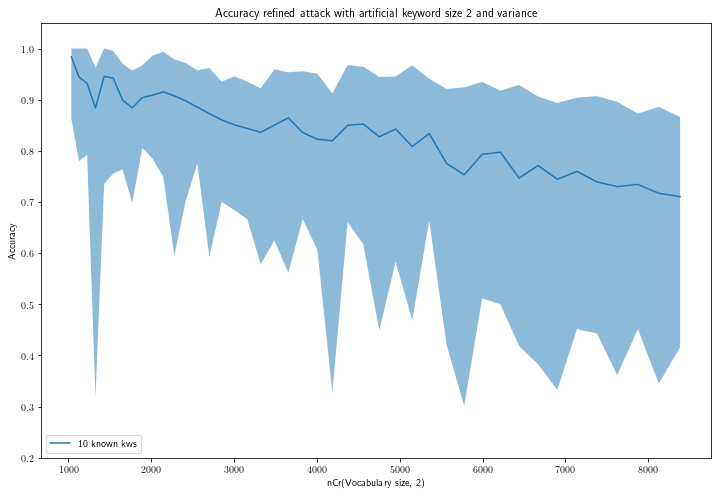

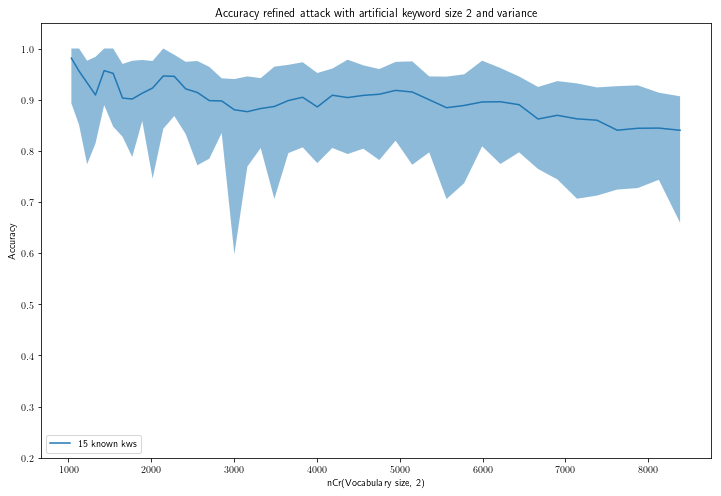

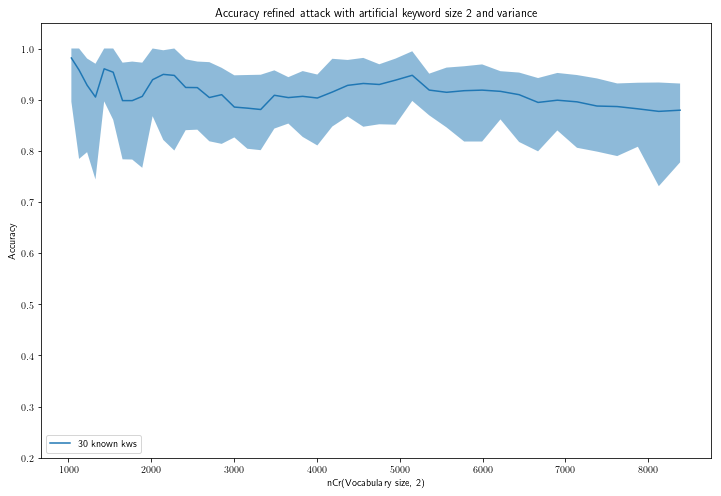

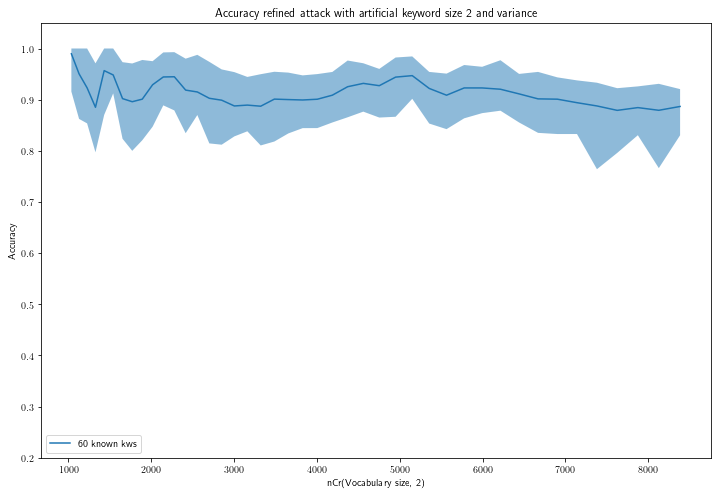

In [16]:
xs = np.array(list(range(46, 131, 2)))
xs_comb = [x*(x+1)/2-x for x in xs]

refined_accurracies = [
    ("5 known kws", df_5_refined_acc, df_5_refined_min, df_5_refined_max),
    ("10 known kws", df_10_refined_acc, df_10_refined_min, df_10_refined_max),
    ("15 known kws", df_15_refined_acc, df_15_refined_min, df_15_refined_max),
    ("30 known kws", df_30_refined_acc, df_30_refined_min, df_30_refined_max),
    ("60 known kws", df_60_refined_acc, df_60_refined_min, df_60_refined_max)
]

for plot_label, refined_acc, refined_min, refined_max in refined_accurracies:
    plt.plot(xs, refined_acc, label=plot_label)
    plt.fill_between(x=xs, y1=refined_min, y2=refined_max, alpha=0.5)
    
    plt.ylim(top=1.05, bottom=0.2)

    plt.title("Accuracy refined attack with artificial keyword size 2 and variance")
    plt.ylabel("Accuracy")
    plt.xlabel("Vocabulary size")

    plt.legend(loc='lower left')
    plt.show()
    
for plot_label, refined_acc, refined_min, refined_max in refined_accurracies:
    plt.plot(xs_comb, refined_acc, label=plot_label)
    plt.fill_between(x=xs_comb, y1=refined_min, y2=refined_max, alpha=0.5)
    
    plt.ylim(top=1.05, bottom=0.2)

    plt.title("Accuracy refined attack with artificial keyword size 2 and variance")
    plt.ylabel("Accuracy")
    plt.xlabel("nCr(Vocabulary size, 2)")

    plt.legend(loc='lower left')
    plt.show()

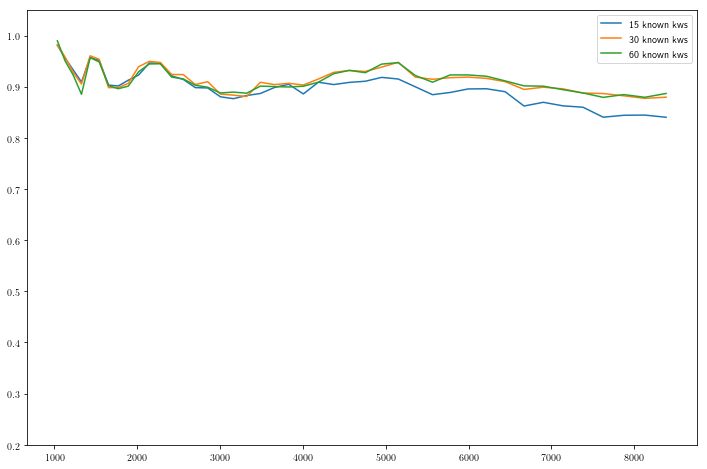

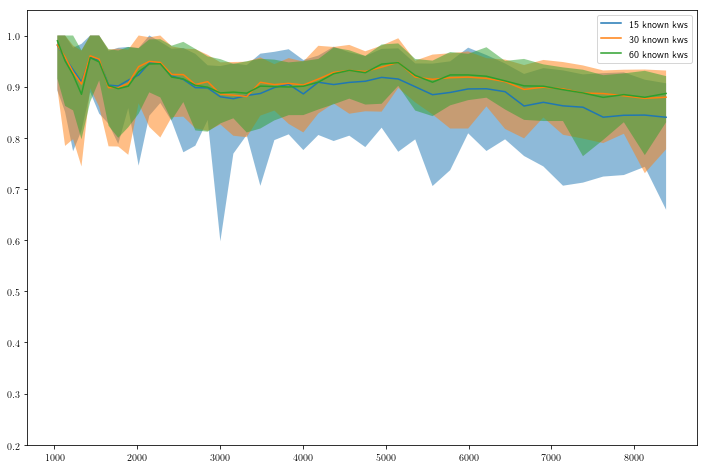

In [17]:
xs = np.array(list(range(46, 131, 2)))

xs = [x*(x+1)/2-x for x in xs]
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(xs, df_15_refined_acc, label="15 known kws")
# plt.fill_between(x=xs, y1=df_15_refined_min, y2=df_15_max, alpha=0.5)

plt.plot(xs, df_30_refined_acc, label="30 known kws")
# plt.fill_between(x=xs, y1=df_30_refined_min, y2=df_30_max, alpha=0.5)

plt.plot(xs, df_60_refined_acc, label="60 known kws")
# plt.fill_between(x=xs, y1=df_60_refined_min, y2=df_60_max, alpha=0.5, color='black')

plt.ylim(top=1.05, bottom=0.2)

plt.legend()
plt.show()

plt.plot(xs, df_15_refined_acc, label="15 known kws")
plt.fill_between(x=xs, y1=df_15_refined_min, y2=df_15_refined_max, alpha=0.5)

plt.plot(xs, df_30_refined_acc, label="30 known kws")
plt.fill_between(x=xs, y1=df_30_refined_min, y2=df_30_refined_max, alpha=0.5)

plt.plot(xs, df_60_refined_acc, label="60 known kws")
plt.fill_between(x=xs, y1=df_60_refined_min, y2=df_60_refined_max, alpha=0.5)

plt.ylim(top=1.05, bottom=0.2)

plt.legend()
plt.show()

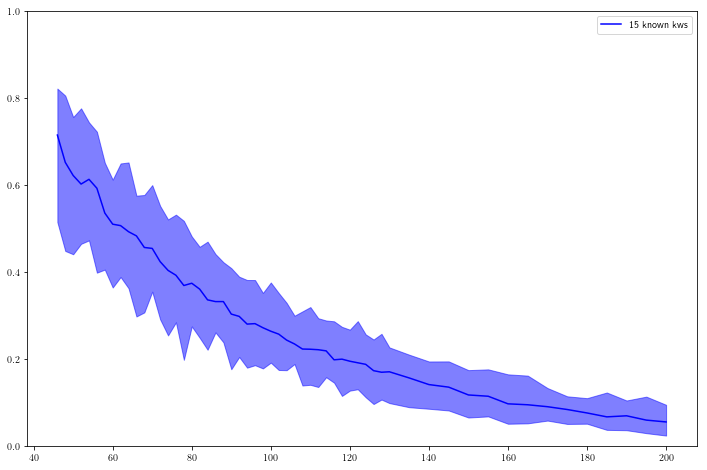

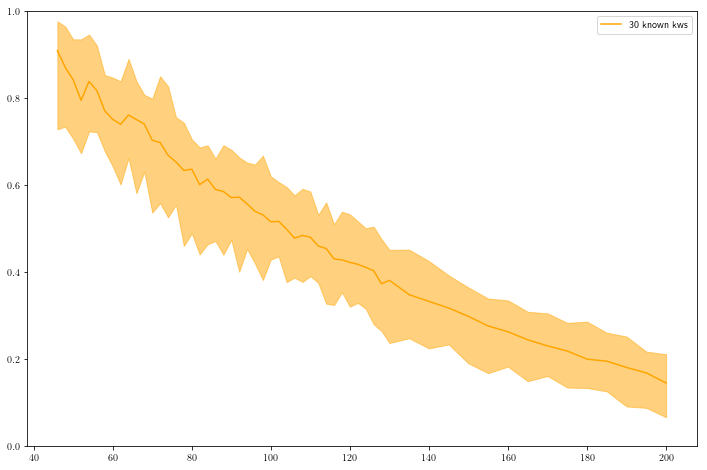

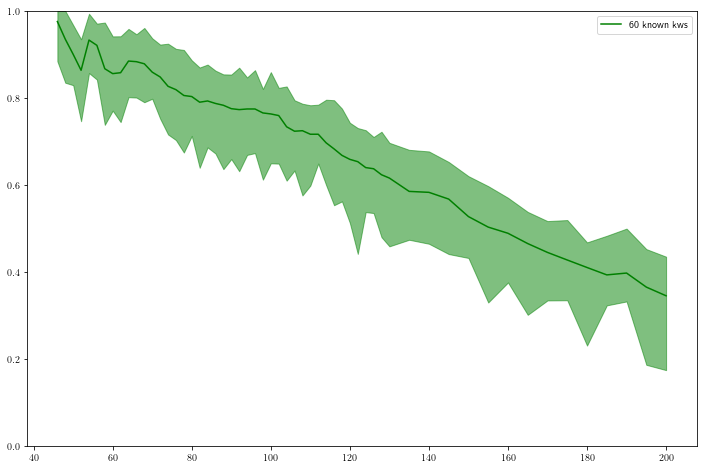

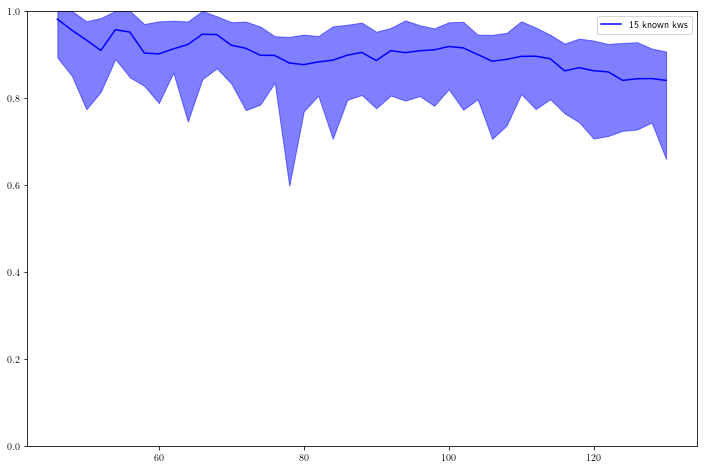

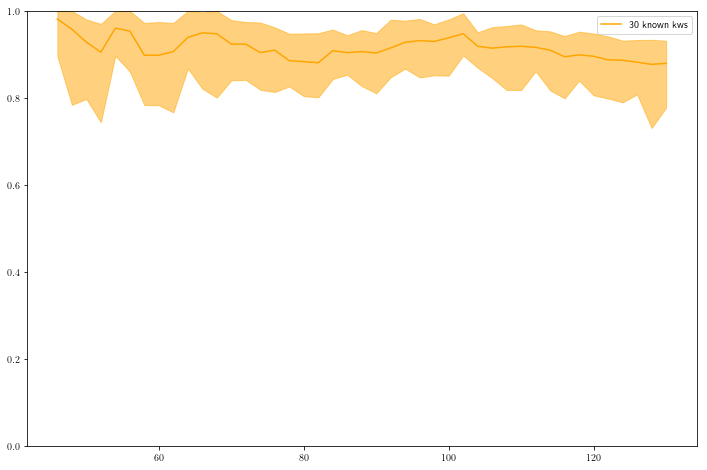

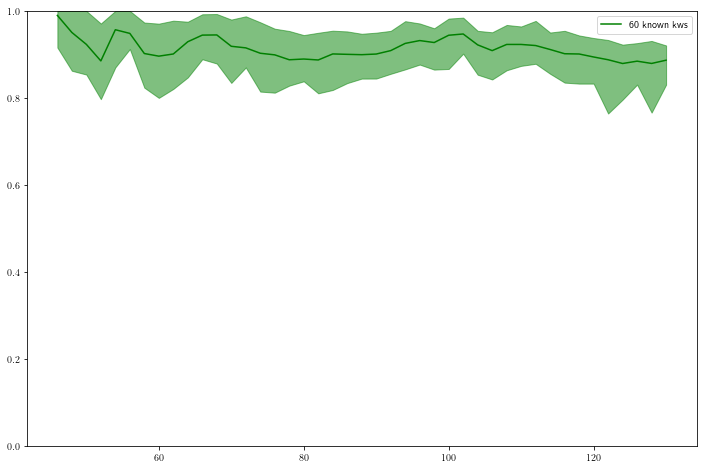

In [18]:
xs = np.array(list(range(46, 131, 2)))
xs_base = list(range(46, 131, 2)) + list(range(135, 201, 5))

plt.plot(df_15_base_acc, label="15 known kws", color='blue')
plt.fill_between(x=xs_base, y1=df_15_base_min, y2=df_15_base_max, alpha=0.5, color='blue')
plt.ylim(top=1.0, bottom=0.0)
plt.legend()
plt.show()

plt.plot(df_30_base_acc, label="30 known kws", color='orange')
plt.fill_between(x=xs_base, y1=df_30_base_min, y2=df_30_base_max, alpha=0.5, color='orange')
plt.ylim(top=1.0, bottom=0.0)
plt.legend()
plt.show()

plt.plot(df_60_base_acc, label="60 known kws", color='green')
plt.fill_between(x=xs_base, y1=df_60_base_min, y2=df_60_base_max, alpha=0.5, color='green')
plt.ylim(top=1.0, bottom=0.0)
plt.legend()
plt.show()

plt.plot(df_15_refined_acc, label="15 known kws", color='blue')
plt.fill_between(x=xs, y1=df_15_refined_min, y2=df_15_refined_max, alpha=0.5, color='blue')
plt.ylim(top=1.0, bottom=0.0)
plt.legend()
plt.show()

plt.plot(df_30_refined_acc, label="30 known kws", color='orange')
plt.fill_between(x=xs, y1=df_30_refined_min, y2=df_30_refined_max, alpha=0.5, color='orange')
plt.ylim(top=1.0, bottom=0.0)
plt.legend()
plt.show()

plt.plot(df_60_refined_acc, label="60 known kws", color='green')
plt.fill_between(x=xs, y1=df_60_refined_min, y2=df_60_refined_max, alpha=0.5, color='green')
plt.ylim(top=1.0, bottom=0.0)
plt.legend()
plt.show()

# Overview base vs refined

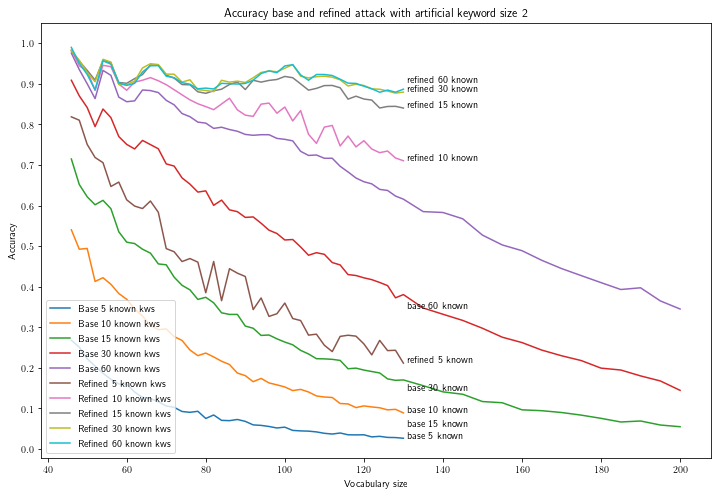

In [19]:
xs = np.array(list(range(46, 131, 2)))
xs_base = list(range(46, 131, 2)) + list(range(135, 201, 5))

plt.plot(xs, df_5_base_acc, label="Base 5 known kws")
plt.text(xs[-1] + 1, df_5_base_acc.values[-1], 'base 5 known')
# plt.fill_between(x=xs, y1=df_5_base_min, y2=df_5_base_max, alpha=0.5)

plt.plot(xs, df_10_base_acc, label="Base 10 known kws")
plt.text(xs[-1] + 1, df_10_base_acc.values[-1], 'base 10 known')
# plt.fill_between(x=xs_10, y1=df_15_base_min, y2=df_10_base_max, alpha=0.5)

plt.plot(xs_base, df_15_base_acc, label="Base 15 known kws")
plt.text(xs[-1] + 1, df_15_base_acc.values[-1], 'base 15 known')
# plt.fill_between(x=xs, y1=df_15_base_min, y2=df_15_base_max, alpha=0.5)

plt.plot(xs_base, df_30_base_acc, label="Base 30 known kws")
plt.text(xs[-1] + 1, df_30_base_acc.values[-1], 'base 30 known')
# plt.fill_between(x=xs, y1=df_30_base_min, y2=df_30_base_max, alpha=0.5)

plt.plot(xs_base, df_60_base_acc, label="Base 60 known kws")
plt.text(xs[-1] + 1, df_60_base_acc.values[-1], 'base 60 known')
# plt.fill_between(x=xs, y1=df_60_base_min, y2=df_60_base_max, alpha=0.5, color='black')


plt.plot(xs, df_5_refined_acc, label="Refined 5 known kws")
plt.text(xs[-1] + 1, df_5_refined_acc.values[-1], 'refined 5 known')
# plt.fill_between(x=xs, y1=df_5_refined_min, y2=df_5_refined_max, alpha=0.5)

plt.plot(xs, df_10_refined_acc, label="Refined 10 known kws")
plt.text(xs[-1] + 1, df_10_refined_acc.values[-1], 'refined 10 known')
# plt.fill_between(x=xs_10, y1=df_10_refined_min, y2=df_10_refined_max, alpha=0.5)

plt.plot(xs, df_15_refined_acc, label="Refined 15 known kws")
plt.text(xs[-1] + 1, df_15_refined_acc.values[-1], 'refined 15 known')
# plt.fill_between(x=xs, y1=df_15_refined_min, y2=df_15_refined_max, alpha=0.5)

plt.plot(xs, df_30_refined_acc, label="Refined 30 known kws")
plt.text(xs[-1] + 1, df_30_refined_acc.values[-1], 'refined 30 known')
# plt.fill_between(x=xs, y1=df_30_refined_min, y2=df_30_refined_max, alpha=0.5)

plt.plot(xs, df_60_refined_acc, label="Refined 60 known kws")
plt.text(xs[-1] + 1, df_60_refined_acc.values[-1] + 0.015, 'refined 60 known')
# plt.fill_between(x=xs, y1=df_60_refined_min, y2=df_60_refined_max, alpha=0.5, color='black')

plt.ylim(top=1.05)

plt.title("Accuracy base and refined attack with artificial keyword size 2")
plt.ylabel("Accuracy")
plt.xlabel("Vocabulary size")

plt.yticks(np.arange(0, 1.1, step=0.1))

plt.legend(loc='lower left')
plt.show()

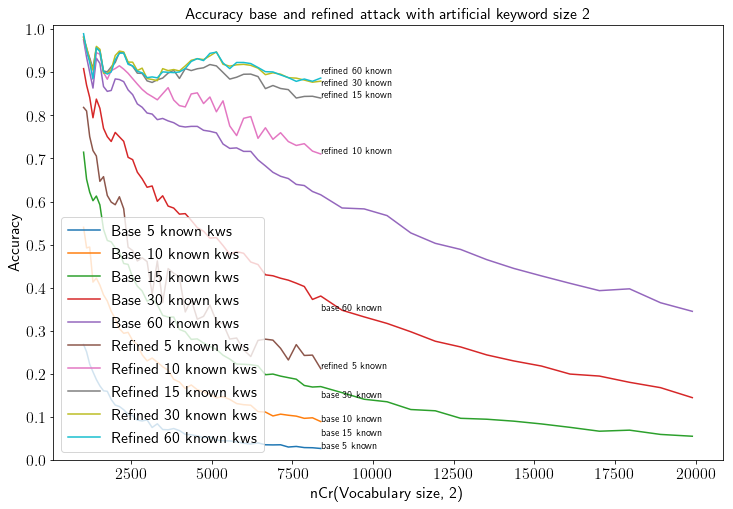

In [20]:
xs = np.array(list(range(46, 131, 2)))
xs_base = list(range(46, 131, 2)) + list(range(135, 201, 5))

xs = np.array([x*(x+1)/2-x for x in xs])
xs_base = np.array([x*(x+1)/2-x for x in xs_base])

plt.plot(xs, df_5_base_acc, label="Base 5 known kws")
plt.text(xs[-1] + 2, df_5_base_acc.values[-1], 'base 5 known')
# plt.fill_between(x=xs, y1=df_5_base_min, y2=df_5_base_max, alpha=0.5)

plt.plot(xs, df_10_base_acc, label="Base 10 known kws")
plt.text(xs[-1] + 2, df_10_base_acc.values[-1], 'base 10 known')
# plt.fill_between(x=xs_10, y1=df_15_base_min, y2=df_10_base_max, alpha=0.5)

plt.plot(xs_base, df_15_base_acc, label="Base 15 known kws")
plt.text(xs[-1] + 2, df_15_base_acc.values[-1], 'base 15 known')
# plt.fill_between(x=xs, y1=df_15_base_min, y2=df_15_base_max, alpha=0.5)

plt.plot(xs_base, df_30_base_acc, label="Base 30 known kws")
plt.text(xs[-1] + 2, df_30_base_acc.values[-1], 'base 30 known')
# plt.fill_between(x=xs, y1=df_30_base_min, y2=df_30_base_max, alpha=0.5)

plt.plot(xs_base, df_60_base_acc, label="Base 60 known kws")
plt.text(xs[-1] + 2, df_60_base_acc.values[-1], 'base 60 known')
# plt.fill_between(x=xs, y1=df_60_base_min, y2=df_60_base_max, alpha=0.5, color='black')


plt.plot(xs, df_5_refined_acc, label="Refined 5 known kws")
plt.text(xs[-1] + 2, df_5_refined_acc.values[-1], 'refined 5 known')
# plt.fill_between(x=xs, y1=df_5_refined_min, y2=df_5_refined_max, alpha=0.5)

plt.plot(xs, df_10_refined_acc, label="Refined 10 known kws")
plt.text(xs[-1] + 2, df_10_refined_acc.values[-1], 'refined 10 known')
# plt.fill_between(x=xs_10, y1=df_10_refined_min, y2=df_10_refined_max, alpha=0.5)

plt.plot(xs, df_15_refined_acc, label="Refined 15 known kws")
plt.text(xs[-1] + 2, df_15_refined_acc.values[-1], 'refined 15 known')
# plt.fill_between(x=xs, y1=df_15_refined_min, y2=df_15_refined_max, alpha=0.5)

plt.plot(xs, df_30_refined_acc, label="Refined 30 known kws")
plt.text(xs[-1] + 2, df_30_refined_acc.values[-1] - 0.01, 'refined 30 known')
# plt.fill_between(x=xs, y1=df_30_refined_min, y2=df_30_refined_max, alpha=0.5)

plt.plot(xs, df_60_refined_acc, label="Refined 60 known kws")
plt.text(xs[-1] + 2, df_60_refined_acc.values[-1] + 0.01, 'refined 60 known')
# plt.fill_between(x=xs, y1=df_60_refined_min, y2=df_60_refined_max, alpha=0.5, color='black')

plt.ylim(top=1.01, bottom=0.0)

plt.title("Accuracy base and refined attack with artificial keyword size 2", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.xlabel("nCr(Vocabulary size, 2)", fontsize=16)

plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=16)
plt.xticks(fontsize=16)

plt.legend(loc='lower left', fontsize=16)
plt.show()

# Regression

[46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]


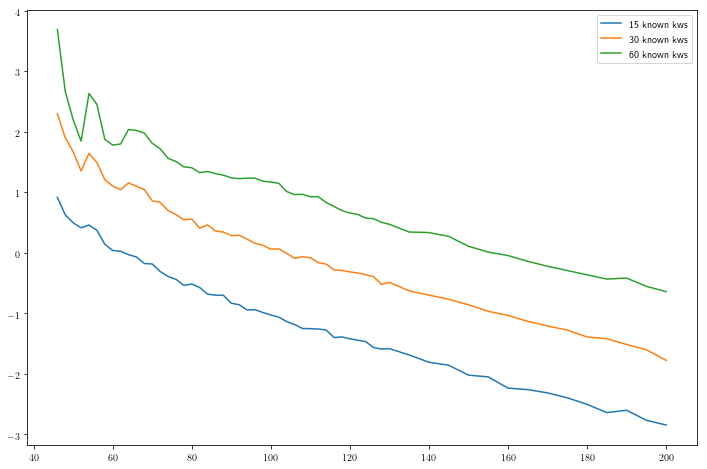

In [21]:
xs = list(range(46, 131, 2)) + list(range(135, 201, 5))
print(xs)

def func(x,L,c,k):
    return L/ (1 + c*np.exp(-k*x))


def logit(p):
    return np.log(p/(1-p))


def inverse_logit(p):
    return 1 / (1 + np.exp(-p))

plt.plot(xs, logit(df_15_base_acc), label="15 known kws")
plt.plot(xs, logit(df_30_base_acc), label="30 known kws")
plt.plot(xs, logit(df_60_base_acc), label="60 known kws")
plt.legend()
plt.show()

In [22]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

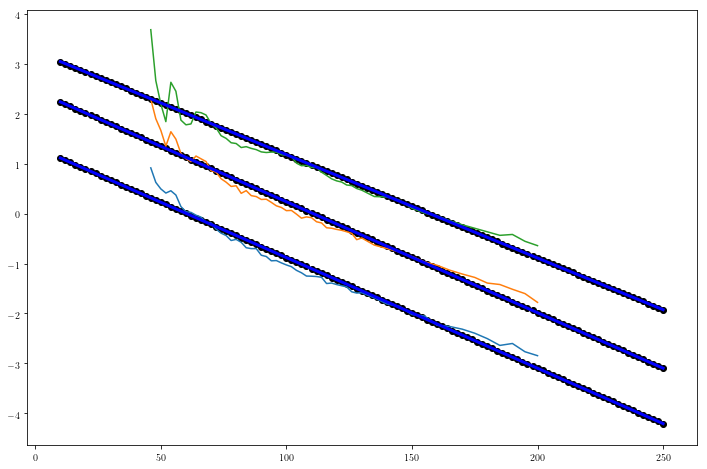

r2_score 15: 0.9685649946048064
r2_score 30: 0.9557241685177198
r2_score 60: 0.9258733108556271


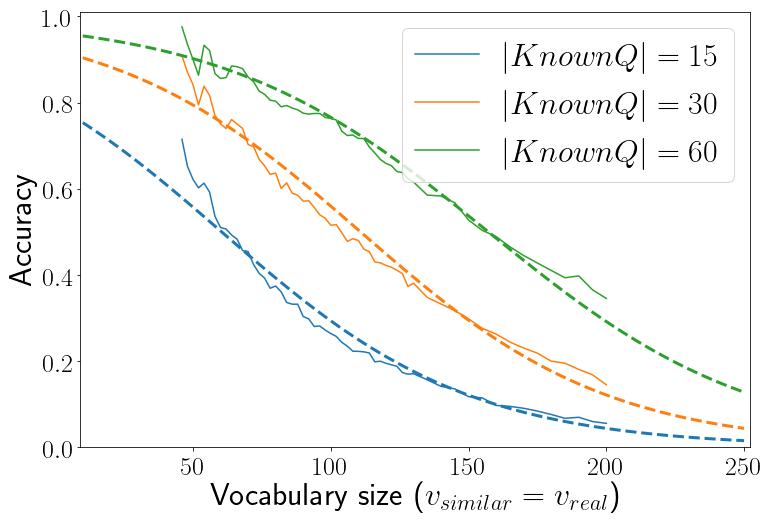

In [23]:
xs = np.array(list(range(46, 131, 2)) + list(range(135, 201, 5)))
xs_test = np.array(list(range(10, 251, 2)))

nb_test = 7
nb_train = len(xs) - nb_test

# Last data points
dataset_X_train = np.array(xs).reshape(-1, 1)

# First data points
dataset_X_test = np.array(xs_test).reshape(-1, 1)

# print(f"Training data set X: {dataset_X_train}")
# print(f"Test data set X: {dataset_X_test}")

for dataset, nb_known in [(df_15_base_acc, '15'), (df_30_base_acc, '30'), (df_60_base_acc, '60')]:
    dataset = logit(dataset)
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset).reshape(-1, 1)
    dataset_y_test = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(dataset_X_train, dataset_y_train)

    # Make predictions using the testing set
    dataset_y_pred = regr.predict(dataset_X_test)
    
#     # The coefficients
#     print('Coefficients: \n', regr.coef_)
#     # The mean squared error
#     print('Mean squared error: %.2f' % mean_squared_error(dataset_y_test, dataset_y_pred))
#     # The coefficient of determination: 1 is perfect prediction
#     print('Coefficient of determination: %.2f' % r2_score(dataset_y_test, dataset_y_pred))
    
    # Plot outputs
    plt.plot(dataset, label=f"{nb_known} known kws")
    plt.scatter(dataset_X_test, dataset_y_pred,  color='black')
    plt.plot(dataset_X_test, dataset_y_pred, color='blue', linewidth=3)

plt.show()


# Inverse logiting
i = 0
for dataset, nb_known in [(df_15_base_acc, '15'), (df_30_base_acc, '30'), (df_60_base_acc, '60')]:
    dataset = logit(dataset)
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset).reshape(-1, 1)
    dataset_y_test = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(dataset_X_train, dataset_y_train)

    # Make predictions using the testing set
    dataset_y_pred = regr.predict(dataset_X_test)
    
    dataset_y_r2_score = r2_score(dataset_y_train, regr.predict(dataset_X_train))
    print(f"r2_score {nb_known}: {dataset_y_r2_score}")
    
#     # The coefficients
#     print('Coefficients: \n', regr.coef_)
#     # The mean squared error
#     print('Mean squared error: %.2f' % mean_squared_error(dataset_y_test, dataset_y_pred))
#     # The coefficient of determination: 1 is perfect prediction
#     print('Coefficient of determination: %.2f' % r2_score(dataset_y_test, dataset_y_pred))
    
    # Plot outputs
    plt.plot(inverse_logit(dataset), label=f"$|KnownQ| = {nb_known}$")
#     plt.scatter(dataset_X_test, inverse_logit(dataset_y_pred),  color='black')
    plt.plot(dataset_X_test, inverse_logit(dataset_y_pred), color=f'C{i}', linestyle='dashed', linewidth=3)  # label=f"$|KnownQ| = {nb_known}$ extrapolated")
    
    i += 1

plt.rcParams["figure.figsize"] = (12,8)
# plt.title("Base score attack, artificial keyword size = 2", fontsize=16)
plt.ylabel("Accuracy", fontsize=32)
plt.xlabel("Vocabulary size ($v_{similar} = v_{real}$)", fontsize=32)

plt.yticks(np.arange(0, 1.1, step=0.2), fontsize=26)
plt.xticks(fontsize=26)

plt.legend(fontsize=32)

plt.ylim(top=1.01, bottom=0.0)
plt.xlim(left=9, right=252)

plt.savefig('base-score-extrapolated-ext.eps', format='eps')

plt.show()

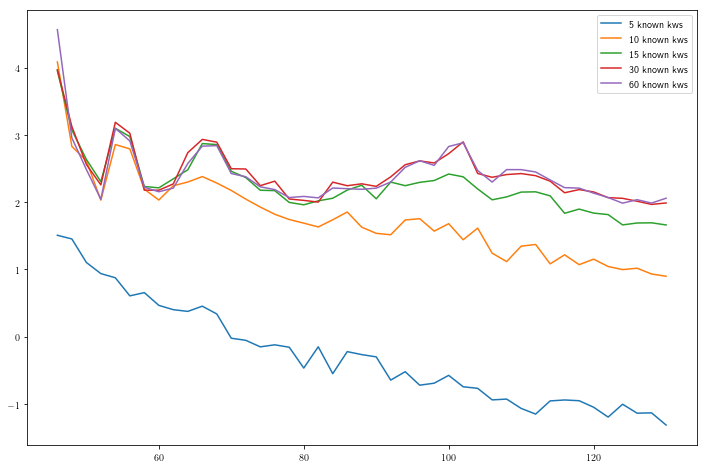

In [24]:
xs = np.array(list(range(46, 131, 2)))

plt.plot(xs, logit(df_5_refined_acc), label="5 known kws")
plt.plot(xs, logit(df_10_refined_acc), label="10 known kws")
plt.plot(xs, logit(df_15_refined_acc), label="15 known kws")
plt.plot(xs, logit(df_30_refined_acc), label="30 known kws")
plt.plot(xs, logit(df_60_refined_acc), label="60 known kws")

# plt.ylim(top=1.05, bottom=0.2)
plt.legend()
plt.show()

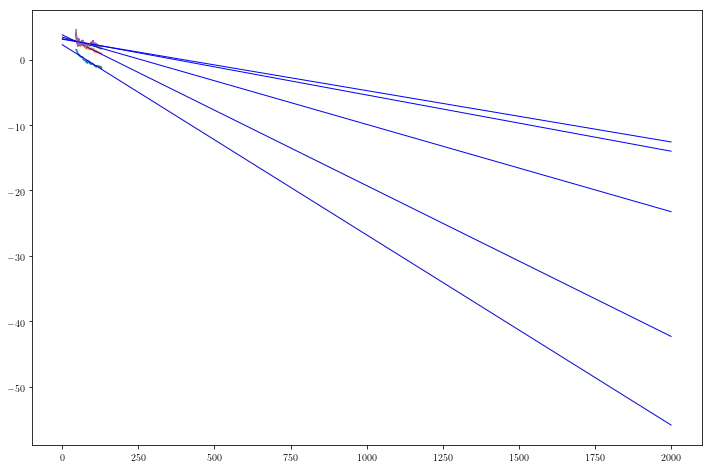

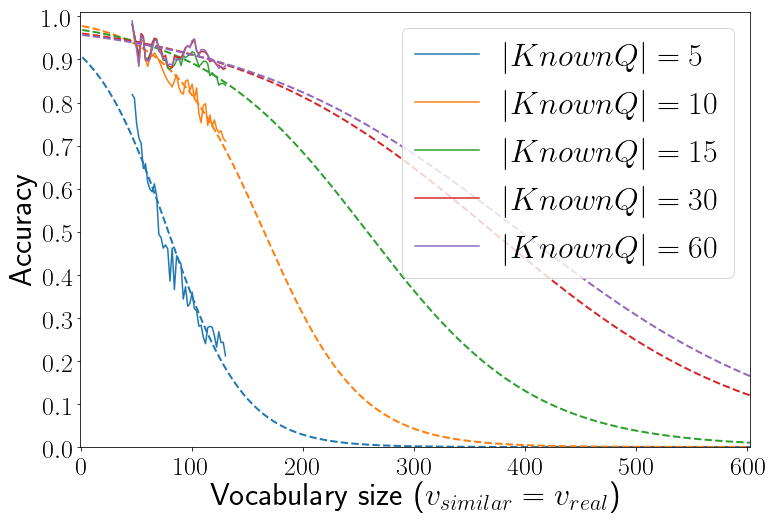

In [25]:
xs = np.array(list(range(46, 131, 2)))
xs_test = np.array(list(range(1, 2001, 2)))

nb_test = 7
nb_train = len(xs) - nb_test

# Last data points
dataset_X_train = np.array(xs).reshape(-1, 1)

# First data points
dataset_X_test = np.array(xs_test).reshape(-1, 1)

# print(f"Training data set X: {dataset_X_train}")
# print(f"Test data set X: {dataset_X_test}")

for dataset, nb_known in [(df_5_refined_acc, '5'), (df_10_refined_acc, '10'), (df_15_refined_acc, '15'), (df_30_refined_acc, '30'), (df_60_refined_acc, '60')]:
    dataset = logit(dataset)
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset).reshape(-1, 1)
    dataset_y_test = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(dataset_X_train, dataset_y_train)

    # Make predictions using the testing set
    dataset_y_pred = regr.predict(dataset_X_test)
    
#     # The coefficients
#     print('Coefficients: \n', regr.coef_)
#     # The mean squared error
#     print('Mean squared error: %.2f' % mean_squared_error(dataset_y_test, dataset_y_pred))
#     # The coefficient of determination: 1 is perfect prediction
#     print('Coefficient of determination: %.2f' % r2_score(dataset_y_test, dataset_y_pred))
    
    # Plot outputs
    plt.plot(dataset, label=f"{nb_known} known kws")
#     plt.scatter(dataset_X_test, dataset_y_pred,  color='black')
    plt.plot(dataset_X_test, dataset_y_pred, color='blue', linewidth=1)

plt.show()


# Inverse logiting
i = 0
for dataset, nb_known in [(df_5_refined_acc, '5'), (df_10_refined_acc, '10'), (df_15_refined_acc, '15'), (df_30_refined_acc, '30'), (df_60_refined_acc, '60')]:
    dataset = logit(dataset)
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset).reshape(-1, 1)
    dataset_y_test = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(dataset_X_train, dataset_y_train)

    # Make predictions using the testing set
    dataset_y_pred = regr.predict(dataset_X_test)
    
#     # The coefficients
#     print('Coefficients: \n', regr.coef_)
#     # The mean squared error
#     print('Mean squared error: %.2f' % mean_squared_error(dataset_y_test, dataset_y_pred))
#     # The coefficient of determination: 1 is perfect prediction
#     print('Coefficient of determination: %.2f' % r2_score(dataset_y_test, dataset_y_pred))
    
    # Plot outputs
    plt.plot(inverse_logit(dataset), label=f"$|KnownQ| = {nb_known}$")
#     plt.scatter(dataset_X_test, inverse_logit(dataset_y_pred),  color='black')
    plt.plot(dataset_X_test, inverse_logit(dataset_y_pred), color=f'C{i}', linestyle='dashed', linewidth=2)
    
    i += 1
    
plt.rcParams["figure.figsize"] = (12,12)

plt.ylabel("Accuracy", fontsize=32)
plt.xlabel("Vocabulary size ($v_{similar} = v_{real}$)", fontsize=32)

plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=26)
plt.xticks(fontsize=26)

plt.ylim(top=1.01, bottom=0.0)
plt.xlim(left=-1, right=602)
plt.legend(fontsize=32)

plt.savefig('refined-score-extrapolated-new.eps', format='eps')

plt.show()

In [26]:
df_5_known_queries_std = df_5_known_queries.groupby('Similar/Server voc size')['Refinement acc'].std()
df_10_known_queries_std = df_10_known_queries.groupby('Similar/Server voc size')['Refinement acc'].std()
df_15_known_queries_std = df_15_known_queries.groupby('Similar/Server voc size')['Refinement acc'].std()
df_30_known_queries_std = df_30_known_queries.groupby('Similar/Server voc size')['Refinement acc'].std()
df_60_known_queries_std = df_60_known_queries.groupby('Similar/Server voc size')['Refinement acc'].std()

[0 1 2 3 4] [0.2115495207667731, 0.7103769045709702, 0.8401932367149759, 0.879429502852486, 0.8867167919799498] [0.15064917501111297, 0.11734192435205087, 0.04683275216510623, 0.03554522296792714, 0.020497651038237773]


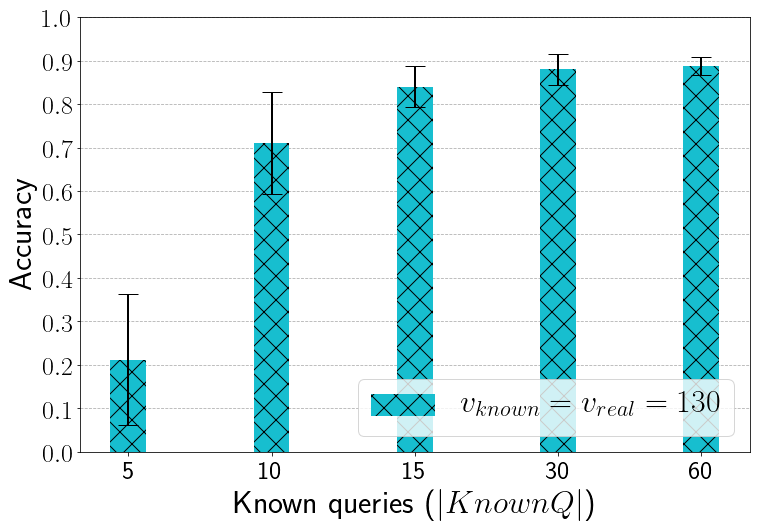

In [27]:
# show variance last vocab size
plt.rcParams["figure.figsize"] = (12,8)
mpl.rc('text', usetex = True)
plt.rcParams['hatch.color'] = 'black'

labels = ['5', '10', '15', '30', '60']
# labels = ['150', '200', '250', '500']

x = np.arange(len(labels))

width = 0.25

fig, ax = plt.subplots()

y = [
    *df_5_refined_acc.tail(1),
    *df_10_refined_acc.tail(1),
    *df_15_refined_acc.tail(1),
    *df_30_refined_acc.tail(1),
    *df_60_refined_acc.tail(1)
]
y_error = [
    *df_5_known_queries_std.tail(1),
    *df_10_known_queries_std.tail(1),
    *df_15_known_queries_std.tail(1),
    *df_30_known_queries_std.tail(1),
    *df_60_known_queries_std.tail(1)
]

ax.grid(axis="y", linestyle='--', zorder=-100000)
ax.bar(x, y, hatch='x', width=width, label="$v_{known} = v_{real} = 130$", color='C9', zorder=2)
ax.errorbar(x, y, yerr=y_error, zorder=3, color='black', linewidth=0, elinewidth=2, capsize=10)

plt.ylabel("Accuracy", fontsize=32)
plt.xlabel("Known queries ($|KnownQ|$)", fontsize=32)

ax.set_xticklabels(labels)

plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=26)

plt.legend(loc='lower right', fontsize=32)

# plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(x, labels, fontsize=26)

plt.ylim(top=1.0, bottom=0.0)

plt.savefig('refined-score-similar-data-std.eps', format='eps')

print(x, y, y_error)

plt.show()

# Extrapolation

In [ ]:
# All data points
X_train = np.array(list(range(46, 131, 2))).reshape(-1, 1)

# Outside of training dataset
X_extrapolate = np.array(list(range(131, 201, 1))).reshape(-1, 1)

for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, dataset_y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_extrapolate)
    
    # Plot outputs
    plt.plot(dataset, label=f"{nb_known} known kws")
    plt.scatter(X_extrapolate, y_pred,  color='black')
    plt.plot(X_extrapolate, y_pred, color='blue', linewidth=1)

plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x,L,c,k):
    return L/ (1 + c*np.exp(-k*x))

# def func(x, a, b, c):
#     return a * np.exp(-b * x) + c

# def func(x, a, b):
#     return a * np.exp(-b * x)

# All data points
X_train = np.array(list(range(46, 131, 2)))
X_train = [x*(x+1)/2 - x for x in X_train]

# Outside of training dataset
X_extrapolate = np.array(list(range(131, 201, 1)))
X_extrapolate = [x*(x+1)/2 - x for x in X_extrapolate]

#
Xs = np.array(list(range(0, 301, 1)))
Xs = [x*(x+1)/2 - x for x in Xs]

for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    # Split the targets into training/testing sets
    dataset_y_train = np.array(dataset)

    popt, pcov = curve_fit(func, X_train, dataset_y_train, p0 = [10, 1e-10, 1e-7], maxfev=120000)
    
    print(popt, pcov)
    
    plt.plot(Xs, [func(x, *popt) for x in Xs], 'r-', label="Fitted Curve")
    
    # Plot outputs
    plt.plot(X_train, dataset, label=f"{nb_known} known kws")
    plt.scatter(X_extrapolate, [func(x, *popt) for x in X_extrapolate],  color='black')
    plt.plot(X_extrapolate, [func(x, *popt) for x in X_extrapolate], color='blue', linewidth=1)

plt.ylim(bottom=0.0, top=1.0)
plt.legend()
plt.show()


In [ ]:
X_extrapolate = np.linspace(-1000, 1000, 100)

plt.plot(X_extrapolate, [func(x, *popt) for x in X_extrapolate], color='blue', linewidth=1)
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor

# All data points
X_train = np.array(xs).reshape(-1, 1)

# Outside of training dataset
X_extrapolate = np.array(list(range(132, 202, 2))).reshape(-1, 1)

for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    # Split the targets into training/testing sets
    y_train = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = MLPRegressor(random_state=10, max_iter=500).fit(X_train, y_train.ravel())

    # Make predictions using the testing set
    y_pred = regr.predict(X_extrapolate)
    
    # Plot outputs
    plt.plot(dataset, label=f"{nb_known} known kws")
    plt.scatter(X_extrapolate, y_pred,  color='black')
    plt.plot(X_extrapolate, y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
from sklearn.linear_model import SGDRegressor

# All data points
X_train = np.array(xs).reshape(-1, 1)

# Outside of training dataset
X_extrapolate = np.array(list(range(92, 202, 2))).reshape(-1, 1)

for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    # Split the targets into training/testing sets
    y_train = np.array(dataset).reshape(-1, 1)

    # Create linear regression object
    regr = SGDRegressor(max_iter=1000000000, tol=0.0000001)
    
    regr.fit(X_train, y_train.ravel())

    # Make predictions using the testing set
    y_pred = regr.predict(X_extrapolate)
    
    # Plot outputs
    plt.plot(dataset, label=f"{nb_known} known kws")
    plt.scatter(X_extrapolate, y_pred,  color='black')
    plt.plot(X_extrapolate, y_pred, color='blue', linewidth=3)

plt.show()

In [ ]:
# All data points
X_train = np.array(xs)

# Outside of training dataset
X_extrapolate = np.array(list(range(132, 202, 2))).reshape(-1, 1)


for dataset, nb_known in [(df_15_acc, '15'), (df_30_acc, '30'), (df_60_acc, '60')]:
    y_train = np.array(dataset)
    
    mymodel = np.poly1d(np.polyfit(X_train, y_train, 3))

    myline = np.linspace(48, 200, 100)

    plt.scatter(X_train, y_train)
    plt.plot(myline, mymodel(myline))
plt.show()

## 